In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn import datasets
import seaborn as sns

In [38]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url, names=['sepal_length','sepal_width','petal_length','petal_width','species'])

In [39]:
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
x = df.loc[:, features].values
y = df.loc[:,['species']].values

In [40]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['Index_1', 'Index_2', 'Index_3'])

In [41]:
finalDf = pd.concat([principalDf, df[['species']]], axis = 1)

In [42]:
x_vals = finalDf['Index_1']
y_vals = finalDf['Index_2']
z_vals = finalDf['Index_3']

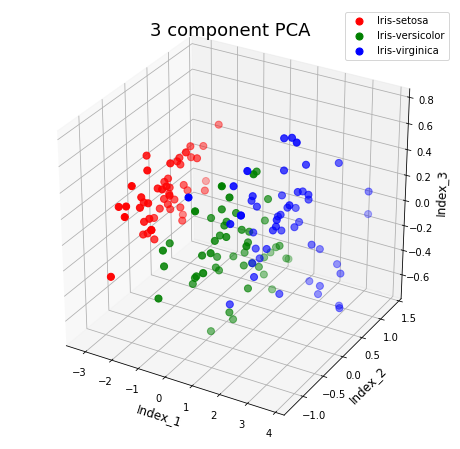

In [43]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random
# Create the figure
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Index_1', fontsize = 12)
ax.set_ylabel('Index_2', fontsize = 12)
ax.set_zlabel('Index_3', fontsize = 12)
ax.set_title('3 component PCA', fontsize = 18)

targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['species'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'Index_1']
               , finalDf.loc[indicesToKeep, 'Index_2']
               , finalDf.loc[indicesToKeep, 'Index_3']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()
plt.show()